In [ ]:
#Using a decision tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/titanic.csv')
data.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
X = data.drop(['Survived'],axis=1)
y = data.Survived
X['Sex'] = X['Sex'].map({'male':1,'female':0})
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30)
feature = ['Pclass','Sex','Age','Fare']

In [ ]:
model = DecisionTreeClassifier().fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
acc = metrics.accuracy_score(ytest,ypred)
print(acc)

0.7453183520599251


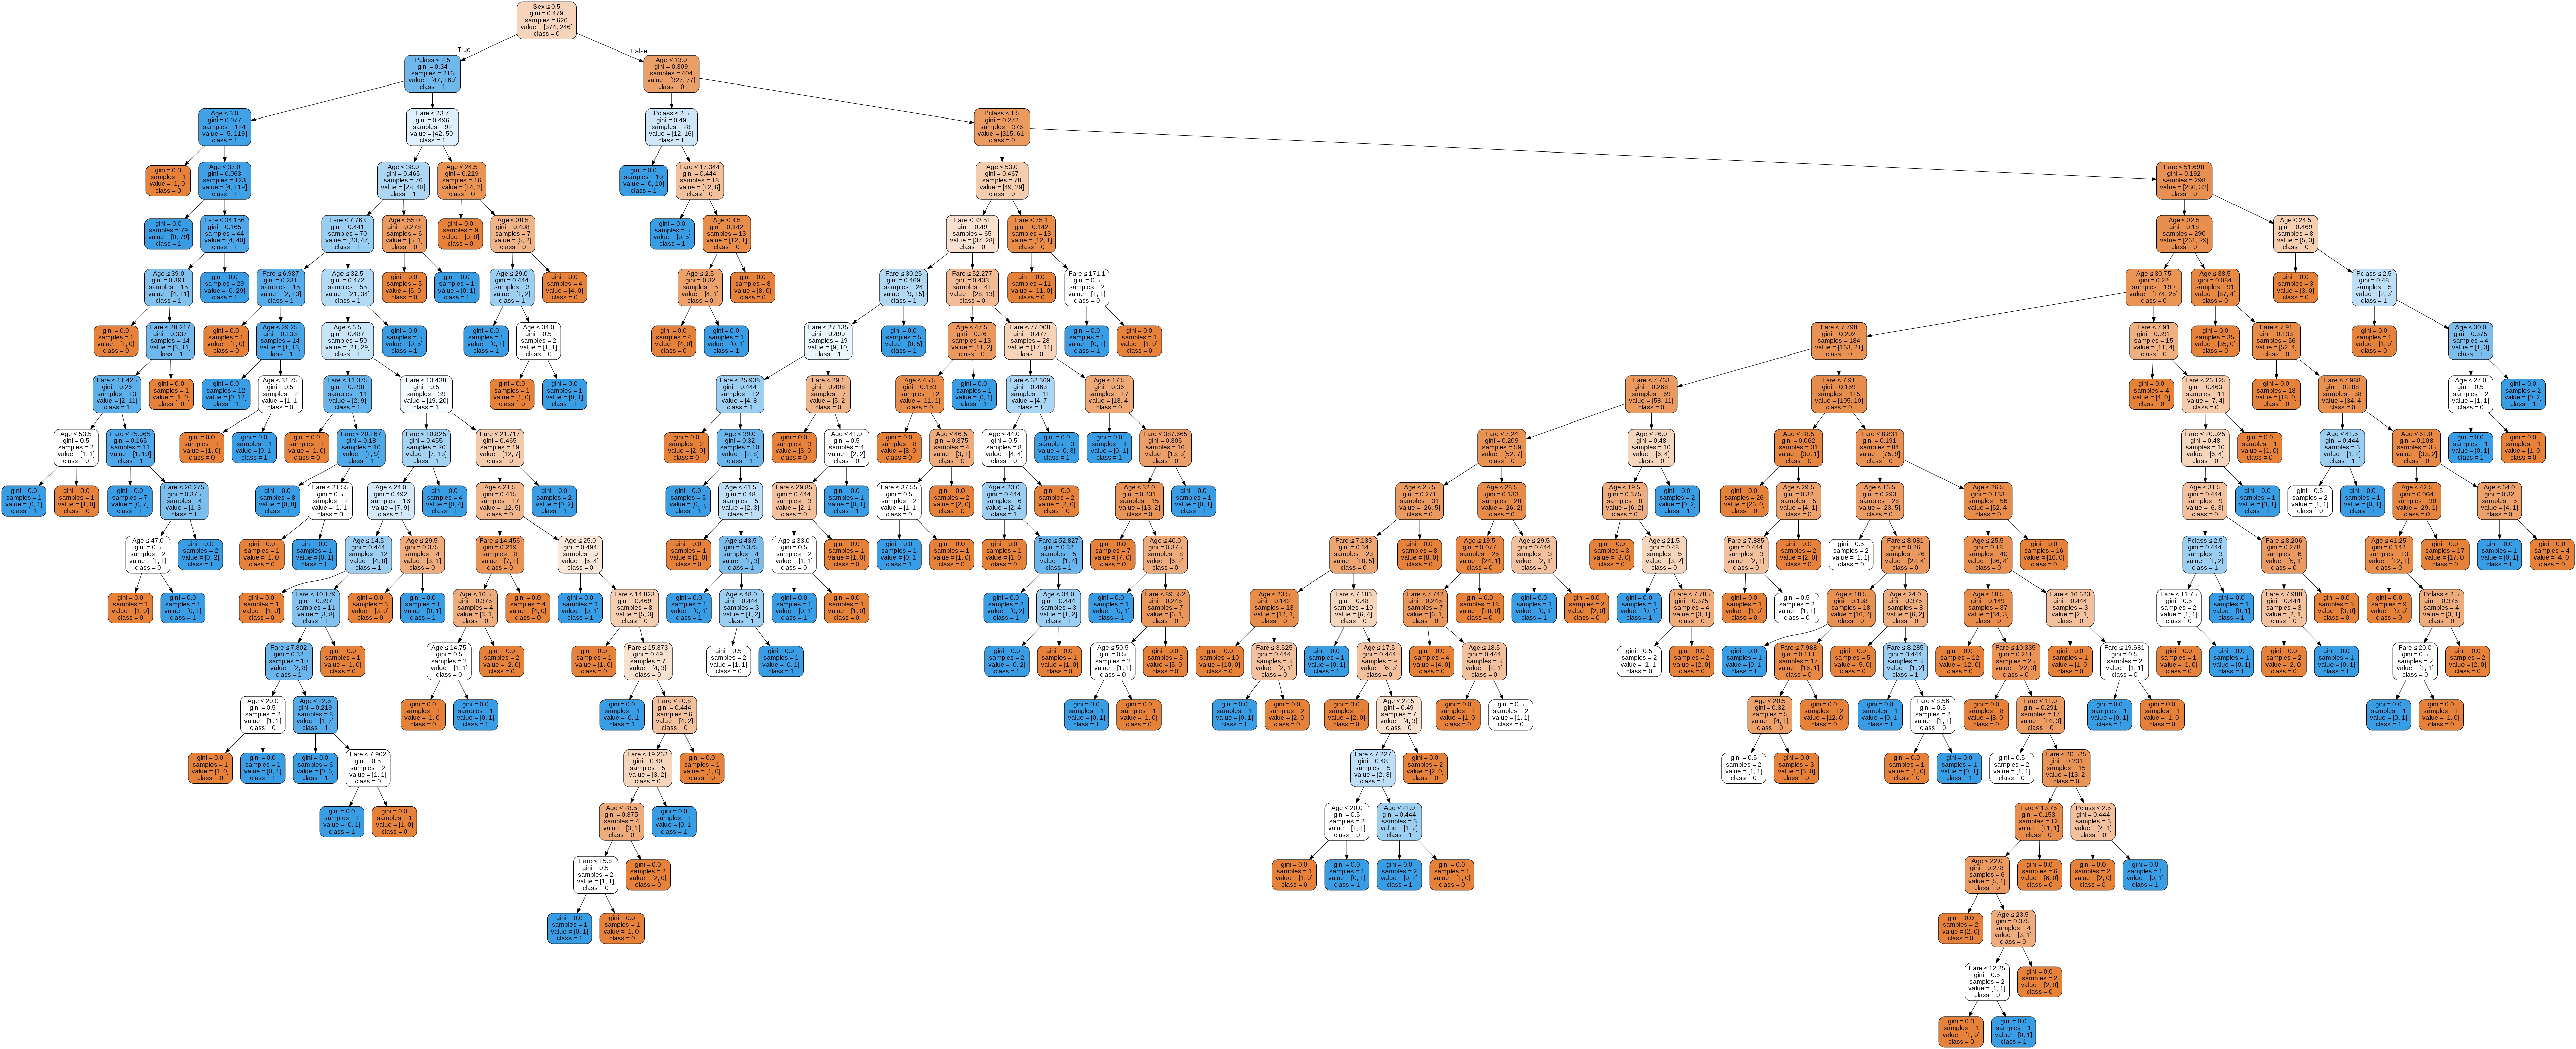

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())